In [1]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt


font_path = 'C:/Windows/Fonts/H2GTRM.TTF'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

In [2]:
os.chdir("C://Users//BIS_COM//data//project//부동산")

In [3]:
seoul_df = pd.read_csv(r'./1.서울아파트매매.csv', encoding='cp949')
busan_df = pd.read_csv(r'./2.부산아파트매매.csv', encoding='cp949')
daegu_df = pd.read_csv(r'./3.대구아파트매매.csv', encoding='cp949')
incheon_df = pd.read_csv(r'./4.인천아파트매매.csv', encoding='cp949')
daejeon_df = pd.read_csv(r'./5.대전아파트매매.csv', encoding='cp949')
sejong_df = pd.read_csv(r'./6.세종아파트매매.csv', encoding='cp949')
gg_df = pd.read_csv(r'./7.경기아파트매매.csv', encoding='cp949')
chong_df = pd.read_csv(r'./8.충북아파트매매.csv', encoding='cp949')

C:\Users\BIS_COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\BIS_COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
seoul_df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202006,23,"149,500",4,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,54.98,202002,24,"144,000",4,1987,언주로 3,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,18,"162,750",4,1987,언주로 3,NaN
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,20,"160,000",5,1987,언주로 3,NaN
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,22,"150,000",2,1987,언주로 3,NaN


In [5]:
df_list = [seoul_df, busan_df, daegu_df, incheon_df, daejeon_df, sejong_df, gg_df, chong_df]

In [6]:
for i in df_list:
    i["거래금액(만원)"] = i["거래금액(만원)"].str.replace(pat=",", repl="", regex=False)
    i['거래금액(만원)'] = pd.to_numeric(i['거래금액(만원)'])

In [7]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       84064 non-null  object 
 1   번지        84038 non-null  object 
 2   본번        84053 non-null  float64
 3   부번        84053 non-null  float64
 4   단지명       84064 non-null  object 
 5   전용면적(㎡)   84064 non-null  float64
 6   계약년월      84064 non-null  int64  
 7   계약일       84064 non-null  int64  
 8   거래금액(만원)  84064 non-null  int64  
 9   층         84064 non-null  int64  
 10  건축년도      84064 non-null  int64  
 11  도로명       84064 non-null  object 
 12  해제사유발생일   2925 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 8.3+ MB


# 규제지역 중 투기과열지구
서울 전지역(17. 8. 3)

경기 과천(17.8.3), 성남분당(17.9.6), 광명,하남(18.8.28), 수원, 성남수정, 안양, 안산        단원, 구리, 군포, 의왕, 용인수지·기흥, 동탄2(20.6.19)

인천 연수, 남동, 서(20.6.19)

대전 동, 중, 서, 유성 (20. 6. 19)

부산 -

대구 수성(17.9.6

세종 세종(17.8.3)

충북

# - seoul (N=25)

In [8]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
           '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
           '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [9]:
price_mean_df = seoul_df.groupby(["계약년월", "시군구"])[
    '거래금액(만원)'].mean().reset_index()
price_count_df = seoul_df.groupby(["계약년월", "시군구"])[
    '거래금액(만원)'].count().reset_index()
price_count_df.head()

,계약년월,시군구,거래금액(만원)
0,202001,서울특별시 강남구 개포동,12
1,202001,서울특별시 강남구 논현동,9
2,202001,서울특별시 강남구 대치동,14
3,202001,서울특별시 강남구 도곡동,20
4,202001,서울특별시 강남구 삼성동,8


In [10]:
seoul_gu_df = price_mean_df.loc[price_mean_df['시군구']. str.contains(gu_list[0])]
seoul_gu_df.head()

,계약년월,시군구,거래금액(만원)
0,202001,서울특별시 강남구 개포동,161583.333333
1,202001,서울특별시 강남구 논현동,125244.444444
2,202001,서울특별시 강남구 대치동,226214.285714
3,202001,서울특별시 강남구 도곡동,214590.000000
4,202001,서울특별시 강남구 삼성동,186000.000000


In [11]:
for i in gu_list:
    a = price_mean_df.loc[price_mean_df['시군구']. str.contains(i)]
    globals()['df_mean_{}'.format(i)] = a.groupby(['계약년월'])['거래금액(만원)'].mean().reset_index()

In [12]:
for i in gu_list:
    a = price_count_df.loc[price_count_df['시군구']. str.contains(i)]
    globals()['df_count_{}'.format(i)] = a.groupby(['계약년월'])['거래금액(만원)'].count().reset_index()

In [13]:
df_mean_강남구.head()

,계약년월,거래금액(만원)
0,202001,154558.642290
1,202002,155797.933464
2,202003,160873.453865
3,202004,166290.745602
4,202005,157656.728903


In [14]:
df_count_강남구.head()

,계약년월,거래금액(만원)
0,202001,14
1,202002,13
2,202003,13
3,202004,13
4,202005,13


In [15]:
df_list = []

for i in gu_list:
    a = price_mean_df.loc[price_mean_df['시군구']. str.contains(i)]
    globals()['df_mean_{}'.format(i)] = a.groupby(
        ['계약년월'])['거래금액(만원)'].mean().reset_index()

    # 생성된 DF 변수명들을 LIST에 추가
    b = 'df_mean_{}'.format(i)
    df_list.append(b)

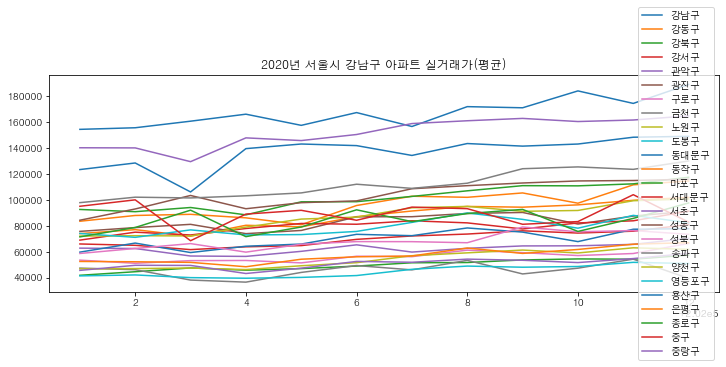

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')

for i in gu_list:
    a = globals()['df_mean_{}'.format(i)]
    ax.plot(a["계약년월"], a["거래금액(만원)"], label=i)

ax.legend(loc="center right")
plt.show()

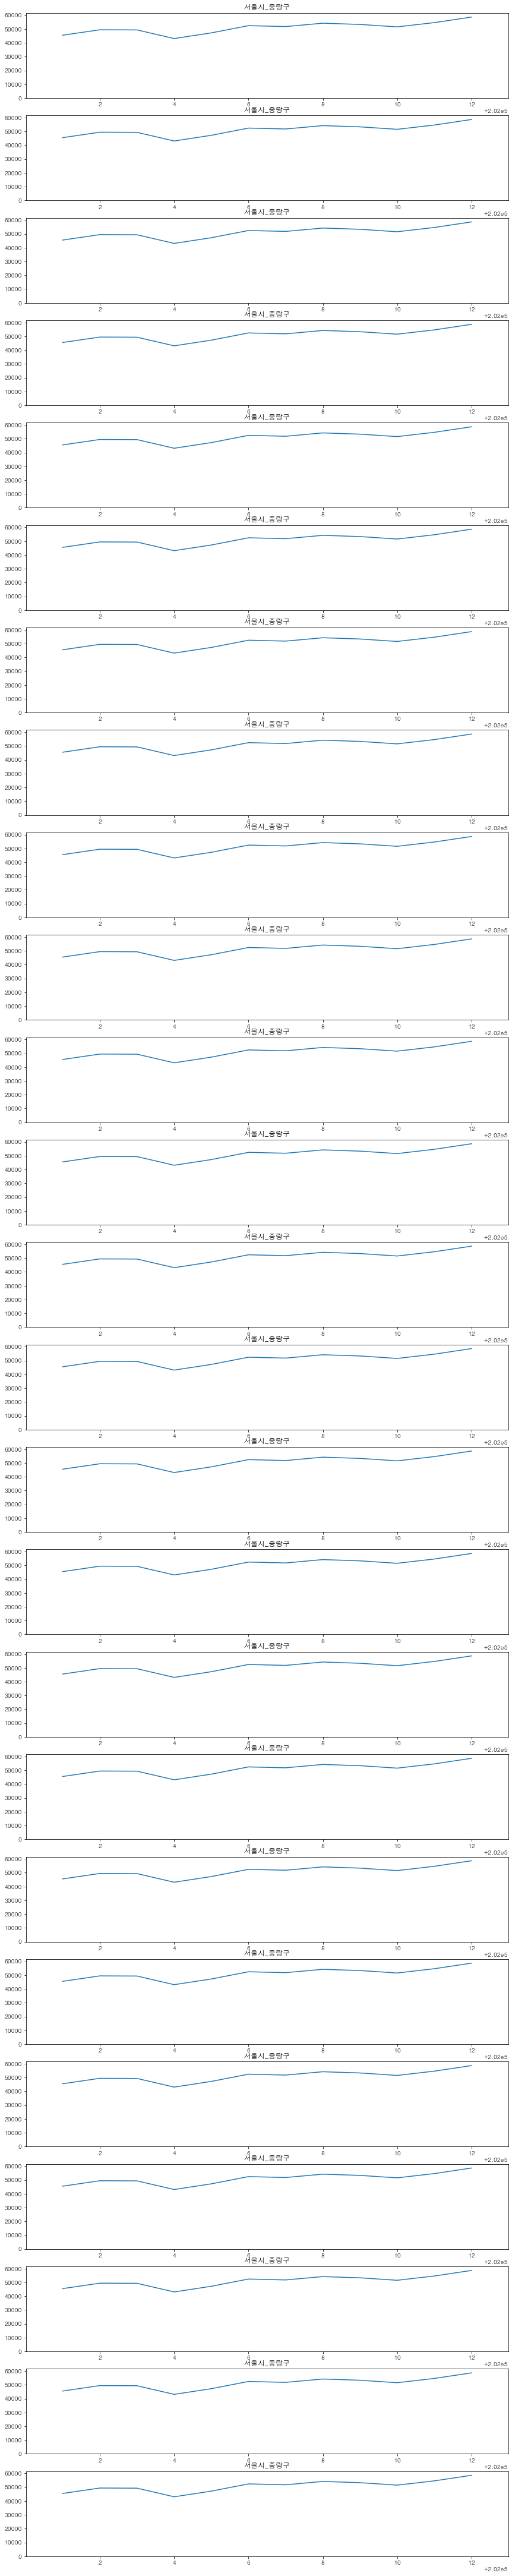

In [35]:
fig, axes = plt.subplots(25, 1, figsize=(12, 60))
plt.tight_layout()
for i in range(25):
    for j in gu_list:
        a = globals()['df_mean_{}'.format(j)]
        b = globals()['df_count_{}'.format(j)]
        axes[i].set_title('서울시_{}'.format(j))
    axes[i].plot(a['계약년월'], a['거래금액(만원)'])
    axes[i].bar(b['계약년월'],b['거래금액(만원)'])
# for i in gu_list:
#     a = globals()['df_mean_{}'.format(i)]
#     ax.plot(a["계약년월"], a["거래금액(만원)"], label=i)

# ax.legend(loc="center right")
plt.show()

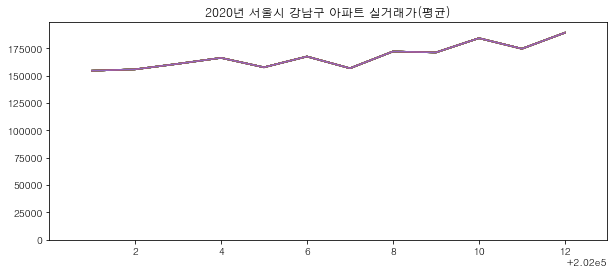

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')
for i in gu_list:
    ax.plot(df_mean_강남구['계약년월'], df_mean_강남구['거래금액(만원)'])
    ax.bar(df_count_강남구['계약년월'], df_count_강남구['거래금액(만원)'])

plt.show()

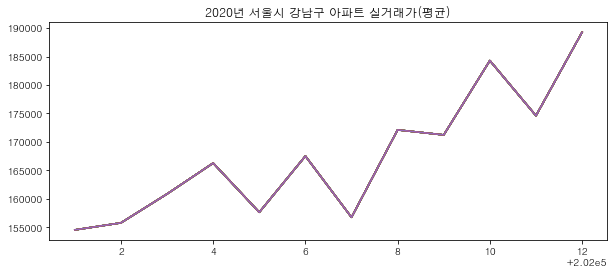

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')
for i in gu_list:
    ax.plot(df_mean_강남구['계약년월'], df_mean_강남구['거래금액(만원)'])

plt.show()

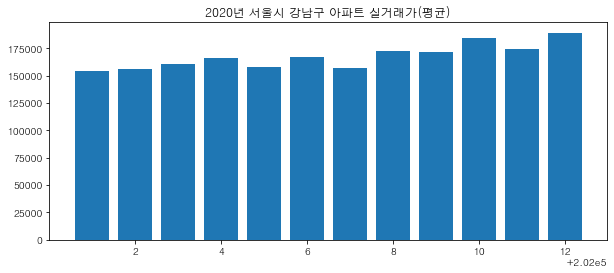

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')
ax.bar(df_mean_강남구['계약년월'], df_mean_강남구['거래금액(만원)'])

plt.show()

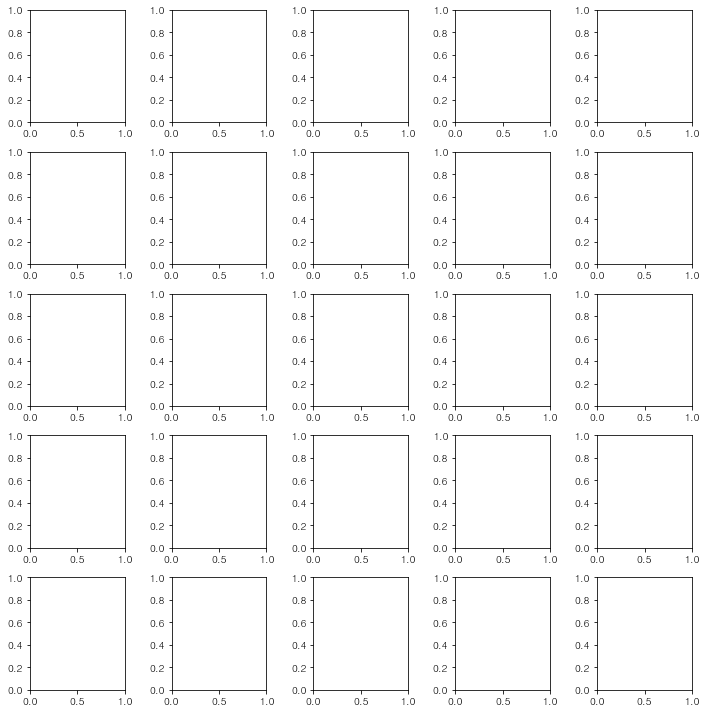

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
plt.tight_layout()
plt.show()

# 규제지역 중 조정대상지역

서울 전 지역(16.11.3)

경기 과천, 성남, 하남, 동탄2(16.11.3), 광명(17.6.19), 구리, 안양동안, 광교지구(18.8.28), 수원팔달, 용인수지‧기흥(8.12.31), 수원영통·권선·장안, 안양만안, 의왕(20.2.21), 고양, 남양주, 화성, 군포, 안성, 부천, 안산, 시흥, 용인처인, 오산, 평택, 광주, 양주, 의정부(20.6.19), 김포(20.11.20)

인천 동, 중, 서, 유성, 대덕(20.6.19)

부산 해운대, 수영, 동래, 남, 연제(’20.11.20)

대구 수성(20.11.20)

충북 청주(20.6.19)